Let's play around a bit with Astropy data input and output. First, we'll start with the basics: astropy tables. 

This is very similar to the pandas dataframes, and works with the same principles. We'll use exploring the DES TNO data with it first.

In [1]:
import numpy as np 
import astropy.table as tb 

In [2]:
tno = tb.Table.read('data/destno_main.fits')

Let's first visualize the data, first in a simple way:

In [3]:
tno

MPC,DES,a,sigma_a,e,sigma_e,i,sigma_i,aop,sigma_aop,lan,sigma_lan,T_p,sigma_T,q,sigma_q,d,sigma_d,m_r,sigma_m,H_r,sigma_H,NUNIQUE,NDETECT,CHI2,x,y,z,vx,vy,vz,Sigma_x_x,Sigma_x_y,Sigma_x_z,Sigma_x_vx,Sigma_x_vy,Sigma_x_vz,Sigma_y_y,Sigma_y_z,Sigma_y_vx,Sigma_y_vy,Sigma_y_vz,Sigma_z_z,Sigma_z_vx,Sigma_z_vy,Sigma_z_vz,Sigma_vx_vx,Sigma_vx_vy,Sigma_vx_vz,Sigma_vy_vy,Sigma_vy_vz,Sigma_vz_vz,Class
bytes10,bytes7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes23
2014 QS510,DES0000,69.5340251440207,0.024195472057917538,0.527551037627513,0.00023427587203301453,13.503270946400834,2.3094223993631473e-05,300.57208602218014,0.03370049607280037,131.64359226010617,0.0008397522267018055,63383.82123084273,4.208521996669004,32.851278028875,0.02769022227006217,34.88629481224716,2.5504506621629986e-07,23.410525287554492,0.07968751087766399,7.958293843705317,0.07968751550725889,7,13,35.751018520104225,28.10251782611154,21.36173342000896,0.33299313944404507,-0.9552571775467587,0.785578356547588,0.37606001849122217,6.040427841804373e-08,4.6553022438424466e-08,4.0514678147572337e-10,8.169514073211976e-09,9.091406493954991e-09,6.810384409317248e-10,3.6055924593916015e-08,3.4701494421685877e-10,9.670266242323039e-09,9.534550610454633e-09,5.325246960532873e-10,2.4365240970106363e-11,8.054599832966152e-10,6.238219074201112e-10,4.623535279713137e-12,7.405106276221606e-08,5.591166695841665e-08,2.5481704318954387e-10,4.238293418999882e-08,2.2449215015768035e-10,2.3351966507638538e-11,Resonant 7:2
2014 SM373,DES0001,45.54980657858885,0.0029210844107731486,0.16245088176621927,0.00010021149741903238,25.41870492361629,2.286426341290176e-05,252.6220297761916,0.08864701024834272,106.1444552892879,0.0006252472638774432,52418.51929227915,19.18026936232989,38.150200335616354,0.0064885265108613885,38.37752098223809,2.4823649190444376e-07,23.153758470536264,0.05013050725780602,7.303133256571861,0.05013051575551594,8,12,25.320969411475975,32.41065315369764,18.307090705860208,-10.033194379220836,-0.3323889667830054,0.9440899058515924,0.4255566768313638,9.413700435410764e-08,5.2935096498613715e-08,-3.0302873347503286e-08,-6.64801200942985e-09,1.2354582112278823e-09,3.107537248642472e-09,2.983067834784092e-08,-1.7033082945045317e-08,-2.2877145628899985e-09,1.4971499571705807e-09,1.2780015769139266e-09,9.770634705837403e-09,2.421944194650955e-09,-2.41880737944455e-10,-1.0918883179502212e-09,4.509172369791125e-08,2.4585173649931908e-08,-1.4657464841086097e-08,1.3685299328796155e-08,-7.945987409888252e-09,4.797269105673469e-09,Classical
2016 TY94,DES0002,48.853285351737576,0.0013393719995620653,0.24573679041599522,3.5405424940244136e-05,25.668665540012142,1.3748876692224594e-05,279.1844771898526,0.09590355874502629,108.72494573368989,0.0006645875005154145,58397.648788714316,19.384983768882417,36.84823580812483,0.0024767939513448876,36.675553093165064,2.6412943990779036e-07,22.763629476280272,0.032106193112071364,7.108055449514225,0.03210620683267572,9,14,13.582755825231242,30.520648172445824,18.45745286086513,-9.360358947061652,-0.4587353083283048,0.9539352369893537,0.4630101938308282,8.612933403297389e-08,5.228006912710254e-08,-2.7210150775831128e-08,8.060102890514259e-08,4.894591131128899e-08,-2.549907854304729e-08,3.1793876740296056e-08,-1.65177787935617e-08,4.965385989027859e-08,3.0163742023888614e-08,-1.5719598785400625e-08,8.627668434685693e-09,-2.5332112861796597e-08,-1.5391510816372627e-08,8.038521883480166e-09,9.961396299853526e-08,5.979000495414423e-08,-3.173101642432671e-08,3.593619006714884e-08,-1.904546707282495e-08,1.0136203832611084e-08,Detached
2014 TF86,DES0003,40.42741592371158,0.007944234025739051,0.078267593

In [4]:
tno.info()

<Table length=316>
    name     dtype 
----------- -------
        MPC bytes10
        DES  bytes7
          a float64
    sigma_a float64
          e float64
    sigma_e float64
          i float64
    sigma_i float64
        aop float64
  sigma_aop float64
        lan float64
  sigma_lan float64
        T_p float64
    sigma_T float64
          q float64
    sigma_q float64
          d float64
    sigma_d float64
        m_r float64
    sigma_m float64
        H_r float64
    sigma_H float64
    NUNIQUE   int32
    NDETECT   int64
       CHI2 float64
          x float64
          y float64
          z float64
         vx float64
         vy float64
         vz float64
  Sigma_x_x float64
  Sigma_x_y float64
  Sigma_x_z float64
 Sigma_x_vx float64
 Sigma_x_vy float64
 Sigma_x_vz float64
  Sigma_y_y float64
  Sigma_y_z float64
 Sigma_y_vx float64
 Sigma_y_vy float64
 Sigma_y_vz float64
  Sigma_z_z float64
 Sigma_z_vx float64
 Sigma_z_vy float64
 Sigma_z_vz float64
Sigma_vx_vx float64
S

Let's sort this data by semi-major axis $a$, and use a more complex interface:

In [5]:
tno.sort('a')
tno.show_in_notebook()

idx,MPC,DES,a,sigma_a,e,sigma_e,i,sigma_i,aop,sigma_aop,lan,sigma_lan,T_p,sigma_T,q,sigma_q,d,sigma_d,m_r,sigma_m,H_r,sigma_H,NUNIQUE,NDETECT,CHI2,x,y,z,vx,vy,vz,Sigma_x_x,Sigma_x_y,Sigma_x_z,Sigma_x_vx,Sigma_x_vy,Sigma_x_vz,Sigma_y_y,Sigma_y_z,Sigma_y_vx,Sigma_y_vy,Sigma_y_vz,Sigma_z_z,Sigma_z_vx,Sigma_z_vy,Sigma_z_vz,Sigma_vx_vx,Sigma_vx_vy,Sigma_vx_vz,Sigma_vy_vy,Sigma_vy_vz,Sigma_vz_vz,Class
0,2014 RO74,DES0171,30.038686353628172,0.0007850672846116024,0.051014928804962036,0.00018704282014340184,29.536957388935285,0.00010799928243460762,114.05609517404768,0.1548981538588323,152.43662381930022,0.00041103520920232297,36800.18890437763,30.02090603289468,28.506264907903248,0.005928715602969344,30.620250455308117,2.1966469764821834e-07,23.235341025900528,0.04737636168994593,8.353176626014085,0.04737636614712122,11,13,23.059705983873766,23.835514367903407,18.563852595007653,-6.641639344251695,-0.6265795673265192,0.9155153890476208,0.09534619893963436,2.519364815560201e-08,1.9447163117959808e-08,-7.393859809209718e-09,-7.021608140358651e-09,-4.140254193161443e-09,1.9165106340357953e-09,1.5122304127423817e-08,-5.720247744361758e-09,-3.4777915986469603e-09,-1.704352507701028e-09,9.107298577275233e-10,2.1832431682541636e-09,1.8450683686682302e-09,1.0493570687676597e-09,-4.990940139367769e-10,4.2601147338560435e-08,3.2341558740796676e-08,-1.2428285256360683e-08,2.4630016378228975e-08,-9.444286874899233e-09,3.638983546833312e-09,Resonant 1:1
1,2014 UU240,DES0041,30.057334335588404,0.0012856041160057758,0.048423735992345944,0.00012879097085042075,35.74448116674539,0.00014338187932721086,73.18916689223694,0.1242094898208456,81.99789191257771,0.00032084021322276255,77452.96898703324,22.98285917958357,28.601845913088198,0.004579172635744542,30.461466184047786,2.9363151526484693e-07,23.040598552256935,0.04963091302004543,8.176424127480002,0.049630920527698456,8,12,13.211101187492455,22.08064040487864,20.529678512545917,-6.4769258972714345,-0.4689429774726092,0.6746646847264204,0.7572953279052905,3.8594484269306036e-08,3.5048236272036966e-08,-1.2111427625673535e-08,-2.1503363848935147e-09,2.5299465380409482e-11,1.7632314273908936e-09,3.187878197013897e-08,-1.099314889337656e-08,-1.3198740453284054e-09,6.098333744571215e-10,1.391779118562233e-09,3.821987110408836e-09,9.603129558871423e-10,2.4519443004616877e-10,-6.358595659965224e-10,1.845240336492729e-08,1.643495088627029e-08,-6.082502586852198e-09,1.4771407712327548e-08,-5.369618916257692e-09,2.0545852428982034e-09,Resonant 1:1
2,2013 RL124,DES0215,30.070990782191146,0.0011424227470227183,0.023960953774546774,4.876152263408888e-05,10.138421570680228,0.00011856702822332615,244.20223887317186,0.18206825798600682,166.8876897955609,0.0005081472385281043,61532.72808472905,28.835750275682948,29.350461162104242,0.0023367944851906903,29.18173908639545,3.1796824280170383e-07,23.301640928894834,0.09620257168786411,8.632873516010736,0.09620257587461163,8,8,9.540446137223054,26.572931075905554,12.479496125753265,1.917417992030246,-0.5114826357294219,1.0197266519955053,0.2669706464639188,5.9182371647556545e-08,2.8626822620414558e-08,4.347241058058767e-09,1.5202057372870167e-09,3.3165418146057965e-09,7.19369876105791e-10,1.3884656667445393e-08,2.107421834431664e-09,1.10830837606906e-09,1.7656158919036117e-09,3.6952214638366774e-10,3.3693673886308453e-10,1.9868641838799483e-10,2.8002079318624563e-10,6.279928262586201e-11,8.1520304052578e-09,3.4558952139014536e-09,4.819979441621368e-10,1.5972084530102916e-09,2.3314691060766027e-10,4.441998873231992e-11,Resonant 1:1
3,2014 SC374,DES0172,30.081771838294095,0.001438066838200642,0.0991939541607043,7.416783041285187e-05,33.728924752313084,0.00023912940944052324,45.13734833240723,0.321512491174951,176.2612091701342,0.0003792131953791699,28010.493767371867,67.144120768428,27.097841941493584,0.00107597212395272,32.70962089091713,5.029340387558172e-07,23.1434745981191,0.06687443232296027,7.973683166919358,0.06687445120420488,6,7,4.067842837496699,25.885382607818336

Much like in `numpy` or `pandas`, we can operate on entire columns with one function call. Let's compute the aphelion $Q = a(1 + e)$:

In [6]:
tno['Q'] = tno['a'] * (1 + tno['e'])
tno

MPC,DES,a,sigma_a,e,sigma_e,i,sigma_i,aop,sigma_aop,lan,sigma_lan,T_p,sigma_T,q,sigma_q,d,sigma_d,m_r,sigma_m,H_r,sigma_H,NUNIQUE,NDETECT,CHI2,x,y,z,vx,vy,vz,Sigma_x_x,Sigma_x_y,Sigma_x_z,Sigma_x_vx,Sigma_x_vy,Sigma_x_vz,Sigma_y_y,Sigma_y_z,Sigma_y_vx,Sigma_y_vy,Sigma_y_vz,Sigma_z_z,Sigma_z_vx,Sigma_z_vy,Sigma_z_vz,Sigma_vx_vx,Sigma_vx_vy,Sigma_vx_vz,Sigma_vy_vy,Sigma_vy_vz,Sigma_vz_vz,Class,Q
bytes10,bytes7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes23,float64
2014 RO74,DES0171,30.038686353628172,0.0007850672846116024,0.051014928804962036,0.00018704282014340184,29.536957388935285,0.00010799928243460762,114.05609517404768,0.1548981538588323,152.43662381930022,0.00041103520920232297,36800.18890437763,30.02090603289468,28.506264907903248,0.005928715602969344,30.620250455308117,2.1966469764821834e-07,23.235341025900528,0.04737636168994593,8.353176626014085,0.04737636614712122,11,13,23.059705983873766,23.835514367903407,18.563852595007653,-6.641639344251695,-0.6265795673265192,0.9155153890476208,0.09534619893963436,2.519364815560201e-08,1.9447163117959808e-08,-7.393859809209718e-09,-7.021608140358651e-09,-4.140254193161443e-09,1.9165106340357953e-09,1.5122304127423817e-08,-5.720247744361758e-09,-3.4777915986469603e-09,-1.704352507701028e-09,9.107298577275233e-10,2.1832431682541636e-09,1.8450683686682302e-09,1.0493570687676597e-09,-4.990940139367769e-10,4.2601147338560435e-08,3.2341558740796676e-08,-1.2428285256360683e-08,2.4630016378228975e-08,-9.444286874899233e-09,3.638983546833312e-09,Resonant 1:1,31.571107799353097
2014 UU240,DES0041,30.057334335588404,0.0012856041160057758,0.048423735992345944,0.00012879097085042075,35.74448116674539,0.00014338187932721086,73.18916689223694,0.1242094898208456,81.99789191257771,0.00032084021322276255,77452.96898703324,22.98285917958357,28.601845913088198,0.004579172635744542,30.461466184047786,2.9363151526484693e-07,23.040598552256935,0.04963091302004543,8.176424127480002,0.049630920527698456,8,12,13.211101187492455,22.08064040487864,20.529678512545917,-6.4769258972714345,-0.4689429774726092,0.6746646847264204,0.7572953279052905,3.8594484269306036e-08,3.5048236272036966e-08,-1.2111427625673535e-08,-2.1503363848935147e-09,2.5299465380409482e-11,1.7632314273908936e-09,3.187878197013897e-08,-1.099314889337656e-08,-1.3198740453284054e-09,6.098333744571215e-10,1.391779118562233e-09,3.821987110408836e-09,9.603129558871423e-10,2.4519443004616877e-10,-6.358595659965224e-10,1.845240336492729e-08,1.643495088627029e-08,-6.082502586852198e-09,1.4771407712327548e-08,-5.369618916257692e-09,2.0545852428982034e-09,Resonant 1:1,31.51282275808861
2013 RL124,DES0215,30.070990782191146,0.0011424227470227183,0.023960953774546774,4.876152263408888e-05,10.138421570680228,0.00011856702822332615,244.20223887317186,0.18206825798600682,166.8876897955609,0.0005081472385281043,61532.72808472905,28.835750275682948,29.350461162104242,0.0023367944851906903,29.18173908639545,3.1796824280170383e-07,23.301640928894834,0.09620257168786411,8.632873516010736,0.09620257587461163,8,8,9.540446137223054,26.572931075905554,12.479496125753265,1.917417992030246,-0.5114826357294219,1.0197266519955053,0.2669706464639188,5.9182371647556545e-08,2.8626822620414558e-08,4.347241058058767e-09,1.5202057372870167e-09,3.3165418146057965e-09,7.19369876105791e-10,1.3884656667445393e-08,2.107421834431664e-09,1.10830837606906e-09,1.7656158919036117e-09,3.6952214638366774e-10,3.3693673886308453e-10,1.9868641838799483e-10,2.8002079318624563e-10,6.279928262586201e-11,8.1520304052578e-09,3.4558952139014536e-09,4.819979441621368e-10,1.5972084530102916e-09,2.3314691060766027e-10,4.441998873231992e-11,Resona

We can also do clever selections. For example, let's choose only the extreme TNOs ($q > 30$ AU, $a > 150$ AU):

In [7]:
extreme = tno[(tno['a'] > 150) & (tno['q'] > 30)]
extreme

MPC,DES,a,sigma_a,e,sigma_e,i,sigma_i,aop,sigma_aop,lan,sigma_lan,T_p,sigma_T,q,sigma_q,d,sigma_d,m_r,sigma_m,H_r,sigma_H,NUNIQUE,NDETECT,CHI2,x,y,z,vx,vy,vz,Sigma_x_x,Sigma_x_y,Sigma_x_z,Sigma_x_vx,Sigma_x_vy,Sigma_x_vz,Sigma_y_y,Sigma_y_z,Sigma_y_vx,Sigma_y_vy,Sigma_y_vz,Sigma_z_z,Sigma_z_vx,Sigma_z_vy,Sigma_z_vz,Sigma_vx_vx,Sigma_vx_vy,Sigma_vx_vz,Sigma_vy_vy,Sigma_vy_vz,Sigma_vz_vz,Class,Q
bytes10,bytes7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes23,float64
508338,DES0205,164.76411257711555,0.044606723070976385,0.7986749464017734,6.32182722120313e-05,23.410485464589183,9.189256996448463e-05,354.78607729470065,0.0362385982599371,33.63424294886075,5.761337539105966e-05,57991.929931066,5.180369293990605,33.171143795652036,0.019392246350080782,32.920403529639024,7.551935358012878e-07,21.824844938433465,0.017025231416994725,6.631157223314286,0.017025400801336937,11,15,21.056504211110298,30.033872697012338,13.709318543690939,3.597643818682529,-0.5775246744907292,0.8850477670517584,1.0118400983393516,5.738319691079299e-07,2.3166452049921137e-07,3.927967919647763e-08,2.9042289842602184e-07,1.1654799889951868e-07,1.8988426626519478e-08,9.355439695943598e-08,1.5865561620224368e-08,1.1715254045825896e-07,4.7029591520917504e-08,7.665344343334722e-09,2.7172798484155193e-09,1.9758958606486918e-08,7.935551144943012e-09,1.3084981462037855e-09,1.486049440712534e-07,5.955680893694355e-08,9.624718842138215e-09,2.3878445296305648e-08,3.861874544001977e-09,6.337650879939519e-10,Scattering,296.3570813585791
2016 QV89,DES0141,171.61434768446026,0.16361665136841028,0.7671753329963548,0.0002554526856337051,21.387575778275863,0.00013529305642686178,281.08463988164146,0.01306706052661413,173.21517700297187,0.00037100986825267093,69914.50357317552,0.5870517232392521,39.956053352682254,0.08192417916212154,49.009396541495825,1.547044939162164e-07,22.842037577995487,0.035775941394913593,5.920788874786215,0.03577594890773585,12,16,21.182574689713867,38.52740450746191,30.95975297740321,-0.4797286877575547,-1.0391130781337568,0.5339939333173375,0.06524517098230438,8.308262837776307e-08,6.756814784061678e-08,-1.4479324581233832e-09,1.0156501189850576e-08,1.064461157969105e-08,-1.653112156789748e-10,5.501042992205733e-08,-1.177201685463106e-09,9.360850583177246e-09,9.524339016984735e-09,-1.5492274200515167e-10,3.775493574570697e-11,-1.6393148239560214e-10,-1.7525106734777924e-10,2.050048755746278e-12,3.2375623588764416e-08,2.5841045202504995e-08,-5.981235284143944e-10,2.072480567227359e-08,-4.767989050544147e-10,2.2624938224176695e-11,Scattering,303.27264201623825
2016 SG58,DES0218,233.0054592735441,0.050191123588444596,0.8493288941510574,3.4274385432165375e-05,13.22083284620366,7.457873540157496e-06,296.29205331085956,0.0058585403766128405,118.97952956850649,0.0003292212181348875,60726.82221358875,0.8322243784894807,35.10719021758565,0.015537744539617636,35.8326295561156,1.2644205644111642e-07,22.82015386578946,0.02697209272386212,7.254003997031006,0.026972096274707976,14,24,32.29348685591357,29.1231976491702,21.53199354366573,0.3438297864394465,-0.9747301953944361,0.9096895895254354,0.4852480286574747,1.6794330236375172e-08,1.2672725026734339e-08,1.5362960155497795e-10,3.0733178539417646e-09,3.096524679183695e-09,2.4334221273885816e-10,9.582042273537456e-09,1.196259631226783e-10,2.504233383014812e-09,2.4652950460549062e-09,1.8220006287319103e-10,6.37172060987785e-12,7.954492009117826e-11,6.403537132086858e-11,1.7553929086216008e-12,3.151136318521765e-09,2.36345730512158e-09,2.4493680576053738e-11,1.8228940446646002e-09,3.096165012363265e-11,6.904528869566479e-12,Scattering,430.90372832950254
2014 WB556,DE

Now, let's select the object among the different dynamical classes (column `Class`). Let's see which ones they are:

In [8]:
np.unique(tno['Class'])

Classical
Detached
Resonant 10:3
Resonant 13:6
Resonant 16:5
Resonant 1:1
Resonant 21:10
Resonant 2:1
Resonant 3:1
Resonant 3:2
Resonant 4:1


The column `N` tells me how many objects of each class we have. Let's save this table inside a FITS file:

In [15]:
cl, number = np.unique(tno['Class'], return_counts=True)


tno_cl = tb.Table()
tno_cl['Class'] = cl
tno_cl['N'] = number

tno_cl

Class,N
bytes23,int64
Classical,134
Detached,54
Resonant 10:3,1
Resonant 13:6,1
Resonant 16:5,1
Resonant 1:1,7
Resonant 21:10,1
Resonant 2:1,5
Resonant 3:1,1


In [20]:
tno_cl.write('data/tno_class.fits', overwrite = True)


We can also save this as a CSV file, or many other formats supported by astropy `table`:

In [19]:
tno_cl.write('data/tno_cl.csv', overwrite = True)

Let's do some brute force selection of the resonant objects, and reconstruct a table with all members of this class.

In [23]:
res = []

for i in tno_cl:
    if i['Class'].startswith('Resonant'):
        res.append(tno[tno['Class'] == i['Class']])

res = tb.vstack(res)

res

MPC,DES,a,sigma_a,e,sigma_e,i,sigma_i,aop,sigma_aop,lan,sigma_lan,T_p,sigma_T,q,sigma_q,d,sigma_d,m_r,sigma_m,H_r,sigma_H,NUNIQUE,NDETECT,CHI2,x,y,z,vx,vy,vz,Sigma_x_x,Sigma_x_y,Sigma_x_z,Sigma_x_vx,Sigma_x_vy,Sigma_x_vz,Sigma_y_y,Sigma_y_z,Sigma_y_vx,Sigma_y_vy,Sigma_y_vz,Sigma_z_z,Sigma_z_vx,Sigma_z_vy,Sigma_z_vz,Sigma_vx_vx,Sigma_vx_vy,Sigma_vx_vz,Sigma_vy_vy,Sigma_vy_vz,Sigma_vz_vz,Class,Q
bytes10,bytes7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes23,float64
2014 RM74,DES0010,67.0695365691953,0.016082472042427732,0.3538216249557451,0.00028339889627192845,32.471929187339406,9.62216722504146e-05,285.0338132109671,0.09655800432133706,149.47374381391916,0.0009359619389618384,63660.36987904692,22.575623318439114,43.338884155253844,0.02930199727628697,43.90567807641216,2.8816008004561117e-07,23.340403175263482,0.053245106990372104,6.890365300396979,0.05324512100576683,8,9,23.555227061213497,25.253677367497364,35.010670176044826,-10.43112534528932,-0.910891413727539,0.5641107191497481,0.20704871862300192,9.94937485889526e-08,1.376315665914418e-07,-4.290992739980574e-08,1.8178125713005252e-08,2.8770061632270637e-08,-8.321099980899448e-09,1.9070183573492112e-07,-5.941365622398137e-08,2.7980967194110825e-08,4.3826767944452133e-08,-1.2756963668766585e-08,1.8597626066030065e-08,-8.144413081495952e-09,-1.2857503670393656e-08,3.78710814034939e-09,9.495427750152192e-08,1.2989696754911735e-07,-4.0662987086619876e-08,1.7805626790555806e-07,-5.5689194306637764e-08,1.749654439346991e-08,Resonant 10:3,90.80018898313674
2013 TX171,DES0078,50.36122582900575,0.004670832138030515,0.27662222400547426,5.668145024993457e-05,19.588811560812527,0.00011733243425031666,203.61654113592692,0.026531574839198192,167.37186288633325,0.00016415170162110097,57056.46716560749,5.22651835711423,36.43019153654424,0.006233124047840165,36.42392810360924,3.6348470719508624e-07,23.00249831468096,0.040889944358984964,7.388054248259754,0.040889964564315026,8,12,17.05570193818929,35.34926963559749,8.601980615079713,-1.9600898924514756,-0.2643436686584342,1.1419768476206271,0.1051365257104457,2.2024279181927746e-07,5.012033672171629e-08,-1.4156428639577406e-08,-1.9035882819179345e-08,4.235459887048011e-09,1.9226665965559377e-09,1.14428843969652e-08,-3.219598024840146e-09,-3.790261471733554e-09,1.0706628027120026e-09,4.01194589816277e-10,9.214332836462581e-10,1.2708665285969634e-09,-2.632911481986071e-10,-1.2387861771097418e-10,1.3478654118692449e-08,1.893112728551918e-09,-9.582955168272381e-10,5.193470225439148e-10,-1.1434515753126674e-10,7.603576578412079e-11,Resonant 13:6,64.29226012146725
2013 RT124,DES0261,65.20851985499053,0.0056409473196854945,0.44265730982035306,4.222836700149618e-05,18.289630017827054,0.0001454835506772186,308.5637052200029,0.031045191084689294,49.55208688982824,0.0003549974597805063,54411.245553099085,5.600171582979161,36.34349187861334,0.005564106312578958,36.68800075087548,3.5139284654813966e-07,23.405595363872607,0.059085731925916235,7.754975322978051,0.05908574515786849,9,10,13.405996906317002,34.852818867181604,11.517790571415032,-2.3057838289892314,-0.16227856555659104,0.9784878761343334,0.7480708776044255,2.0301648122133182e-07,6.294943186304893e-08,-1.6429518600784936e-08,-5.130610016185999e-08,-1.0382780037528952e-08,9.070861617960875e-09,1.9584706929128762e-08,-5.077973548561229e-09,-1.509356529629326e-08,-2.965040997871641e-09,2.7284990527114053e-09,1.3773844585183585e-09,4.697545899964215e-09,9.982983014045647e-10,-7.742729701373378e-10,3.89311490114186e-08,1.0162500950893094e-08,-4.961789118219421e-09,2.7326563000912215e-09,-1.2392049144617717e-09,6.915105787234286e-10,Resonant 16:5,9

Plot all TNOs semi-major axes $a$, eccentricity $e$ and inclination $i$ parameters color-coded by their dynamical classes! 

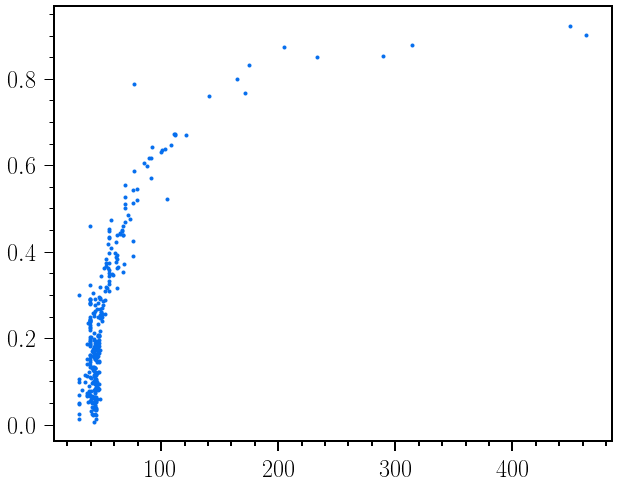

In [26]:
pl.plot(tno['a'], tno['e'], '.')
#pl.plot(tno['a'], tno['i'], '.')
pl.show()

Now, let's see how we can interface with FITS files with multiple extensions. I want to create a file called `tnotable.fits` that containt both the table stored inside the `tno` variable and the breakdown by classes we made in `tno_cl`. To do that, we'll need `astropy.io.fits`

In [27]:
import astropy.io.fits as  pf

In [28]:
tno = pf.open('data/destno_main.fits')

print(tno)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f615905cda0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f6159077080>]


In [40]:
tno = tb.Table(tno[1].data)
tno

MPC,DES,a,sigma_a,e,sigma_e,i,sigma_i,aop,sigma_aop,lan,sigma_lan,T_p,sigma_T,q,sigma_q,d,sigma_d,m_r,sigma_m,H_r,sigma_H,NUNIQUE,NDETECT,CHI2,x,y,z,vx,vy,vz,Sigma_x_x,Sigma_x_y,Sigma_x_z,Sigma_x_vx,Sigma_x_vy,Sigma_x_vz,Sigma_y_y,Sigma_y_z,Sigma_y_vx,Sigma_y_vy,Sigma_y_vz,Sigma_z_z,Sigma_z_vx,Sigma_z_vy,Sigma_z_vz,Sigma_vx_vx,Sigma_vx_vy,Sigma_vx_vz,Sigma_vy_vy,Sigma_vy_vz,Sigma_vz_vz,Class
str10,str7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str23
2014 QS510,DES0000,69.5340251440207,0.024195472057917538,0.527551037627513,0.00023427587203301453,13.503270946400834,2.3094223993631473e-05,300.57208602218014,0.03370049607280037,131.64359226010617,0.0008397522267018055,63383.82123084273,4.208521996669004,32.851278028875,0.02769022227006217,34.88629481224716,2.5504506621629986e-07,23.410525287554492,0.07968751087766399,7.958293843705317,0.07968751550725889,7,13,35.751018520104225,28.10251782611154,21.36173342000896,0.33299313944404507,-0.9552571775467587,0.785578356547588,0.37606001849122217,6.040427841804373e-08,4.6553022438424466e-08,4.0514678147572337e-10,8.169514073211976e-09,9.091406493954991e-09,6.810384409317248e-10,3.6055924593916015e-08,3.4701494421685877e-10,9.670266242323039e-09,9.534550610454633e-09,5.325246960532873e-10,2.4365240970106363e-11,8.054599832966152e-10,6.238219074201112e-10,4.623535279713137e-12,7.405106276221606e-08,5.591166695841665e-08,2.5481704318954387e-10,4.238293418999882e-08,2.2449215015768035e-10,2.3351966507638538e-11,Resonant 7:2
2014 SM373,DES0001,45.54980657858885,0.0029210844107731486,0.16245088176621927,0.00010021149741903238,25.41870492361629,2.286426341290176e-05,252.6220297761916,0.08864701024834272,106.1444552892879,0.0006252472638774432,52418.51929227915,19.18026936232989,38.150200335616354,0.0064885265108613885,38.37752098223809,2.4823649190444376e-07,23.153758470536264,0.05013050725780602,7.303133256571861,0.05013051575551594,8,12,25.320969411475975,32.41065315369764,18.307090705860208,-10.033194379220836,-0.3323889667830054,0.9440899058515924,0.4255566768313638,9.413700435410764e-08,5.2935096498613715e-08,-3.0302873347503286e-08,-6.64801200942985e-09,1.2354582112278823e-09,3.107537248642472e-09,2.983067834784092e-08,-1.7033082945045317e-08,-2.2877145628899985e-09,1.4971499571705807e-09,1.2780015769139266e-09,9.770634705837403e-09,2.421944194650955e-09,-2.41880737944455e-10,-1.0918883179502212e-09,4.509172369791125e-08,2.4585173649931908e-08,-1.4657464841086097e-08,1.3685299328796155e-08,-7.945987409888252e-09,4.797269105673469e-09,Classical
2016 TY94,DES0002,48.853285351737576,0.0013393719995620653,0.24573679041599522,3.5405424940244136e-05,25.668665540012142,1.3748876692224594e-05,279.1844771898526,0.09590355874502629,108.72494573368989,0.0006645875005154145,58397.648788714316,19.384983768882417,36.84823580812483,0.0024767939513448876,36.675553093165064,2.6412943990779036e-07,22.763629476280272,0.032106193112071364,7.108055449514225,0.03210620683267572,9,14,13.582755825231242,30.520648172445824,18.45745286086513,-9.360358947061652,-0.4587353083283048,0.9539352369893537,0.4630101938308282,8.612933403297389e-08,5.228006912710254e-08,-2.7210150775831128e-08,8.060102890514259e-08,4.894591131128899e-08,-2.549907854304729e-08,3.1793876740296056e-08,-1.65177787935617e-08,4.965385989027859e-08,3.0163742023888614e-08,-1.5719598785400625e-08,8.627668434685693e-09,-2.5332112861796597e-08,-1.5391510816372627e-08,8.038521883480166e-09,9.961396299853526e-08,5.979000495414423e-08,-3.173101642432671e-08,3.593619006714884e-08,-1.904546707282495e-08,1.0136203832611084e-08,Detached
2014 TF86,DES0003,40.42741592371158,0.007944234025739051,0.078267593879588

FITS files are represent by a bunch of "HDU"s, whatever that means. Let's make a new file. We can't directly save an astropy table to a multi-extension FITS file, we need to convert first (note that this is done by default in `Table.write` for single extension fits).

In [41]:
hdu_list = pf.HDUList()

In [43]:
#convert to binary table
tno_bin = pf.table_to_hdu(tno)
cl_bin = pf.table_to_hdu(tno_cl)

hdu_list.append(tno_bin)
hdu_list.append(cl_bin)

In [44]:
hdu_list

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f61590865f8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f6159017550>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f615906a6d8>]

We can give these extensions names:

In [45]:
hdu_list[1].header['EXTNAME'] = 'TNO'
hdu_list[2].header['EXTNAME'] = 'CLASS'

In [46]:
hdu_list.writeto('data/tno_multi.fits', overwrite = True)

And we can load it back using astropy `Table`:

In [47]:
tno = tb.Table.read('data/tno_multi.fits', 'TNO')
tno_cl = tb.Table.read('data/tno_multi.fits', 'CLASS')

In [48]:
tno, tno_cl

(<Table length=316>
    MPC       DES           a          ...      Sigma_vz_vz          Class    
  bytes10    bytes7      float64       ...        float64           bytes23   
 ---------- ------- ------------------ ... ---------------------- ------------
 2014 QS510 DES0000   69.5340251440207 ... 2.3351966507638538e-11 Resonant 7:2
 2014 SM373 DES0001  45.54980657858885 ...  4.797269105673469e-09    Classical
  2016 TY94 DES0002 48.853285351737576 ... 1.0136203832611084e-08     Detached
  2014 TF86 DES0003  40.42741592371158 ...  1.660225377178697e-07    Classical
 2014 SN373 DES0004 103.22640448297263 ... 2.5123766718012995e-07     Detached
 2014 QT510 DES0005  39.48914644444534 ...  1.936960903062648e-08 Resonant 3:2
  2014 RJ70 DES0006  46.86384109828465 ... 2.5336771143991738e-06    Classical
  2014 RL74 DES0007 46.784209790791394 ... 1.3843643393282443e-08    Classical
 2014 QU510 DES0008  40.89310044063847 ...   6.11755695948883e-08    Classical
 2014 SO373 DES0009  41.81925407